In [10]:
from network import *
import numpy as np
import random
import matplotlib.pyplot as plt

### Task: Linear Regression

Train a neural network to approximate a linear function parametrized by a slope and intercept

In [11]:
m = 2
b = 1
def generate_training_example():
    model_in = np.random.randint(low=-10, high=10, size=(1, 1))
    model_out = m * model_in + b
    return model_in, model_out

In [12]:
a, b = generate_training_example()

In [13]:
model = Sequential([
    Layer(1, 1) # Note that the bias term in the layer covers for the y-intercept
],
criterion=MSELoss())

In [14]:
data = [generate_training_example() for _ in range(100)]

In [15]:
losses = []
ms, bs = [], []
for _ in range(250):
    model_in, model_out = random.choice(data)
    pred_out = model.forward(model_in)
    loss = model.calculate_loss(model_out, pred_out)
    model.backward()
    model.SGD_step()
    
    losses.append(loss)
    m, b = model.modules[0].weights[0]
    ms.append(m)
    bs.append(b)

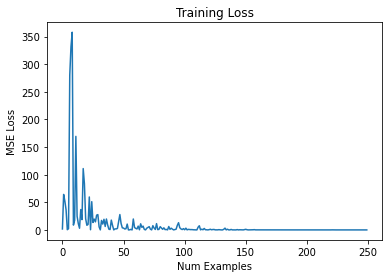

In [16]:
plt.plot(range(len(losses)), losses)
plt.title("Training Loss")
plt.xlabel("Num Examples")
plt.ylabel("MSE Loss")
plt.show()

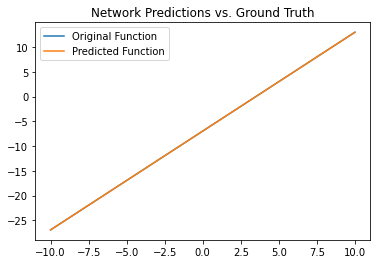

In [17]:
import matplotlib.pyplot as plt

xs = np.linspace(-10, 10, 100)
ys = (m * xs + b).flatten()
data = xs[..., None, None]
model_ys = np.array([model.forward(x).flatten() for x in data])

plt.plot(xs, ys, label='Original Function')
plt.plot(xs, model_ys, label='Predicted Function')
plt.legend()
plt.title("Network Predictions vs. Ground Truth")
plt.show()

### Visualization of Learning

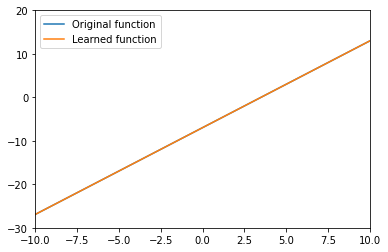

In [21]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

t = np.linspace(-10,10)

fig, ax = plt.subplots()
ax.axis([-10,10,-30,20])
ax.plot(xs, ys, label="Original function")
l, = ax.plot([],[], label="Learned function")
ax.legend()

def animate(i):
    m, b = ms[i], bs[i]
    x = m * t + b
    l.set_data(t, x)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(ms))

from IPython.display import HTML
HTML(ani.to_jshtml())